## Libraries

In [39]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# text processing libraries
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# algorithms and evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
# logistic regression model
from sklearn.linear_model.logistic import LogisticRegression


%matplotlib inline
sns.set_style('whitegrid')

## Data

In [2]:
df = pd.read_csv('Reviews.csv',index_col='Id')

In [3]:
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568454 entries, 1 to 568454
Data columns (total 9 columns):
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(4), object(5)
memory usage: 43.4+ MB


Check missing data

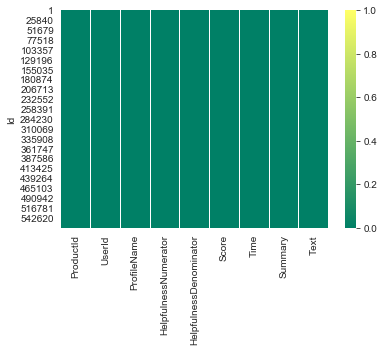

In [5]:
sns.heatmap(df.isnull(),cmap='summer')

## EDA

Adding `text_length` column

In [6]:
df['text_length'] = df.Text.apply(len)
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,text_length
Id,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140


#### How does the distribution for `text_length` look like?

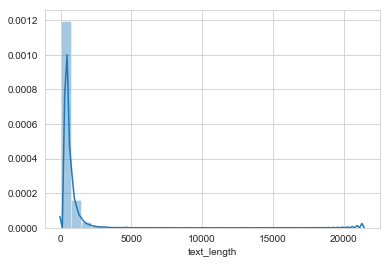

In [7]:
sns.distplot(df.text_length,bins=30)

We see that most reviews are less than 1000 in length

#### Do `text_lengths` vary depending on the `scores`?

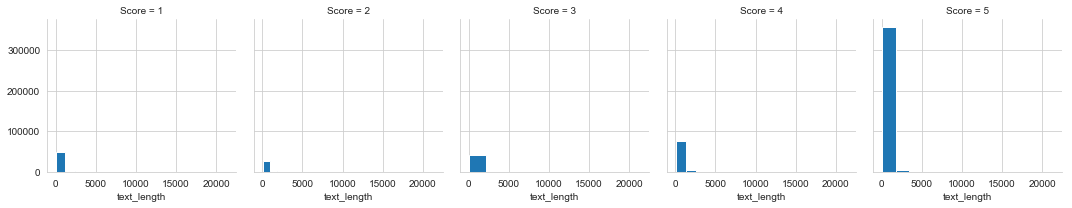

In [8]:
ax = sns.FacetGrid(df,col='Score')
ax.map(plt.hist,'text_length')

We see that the higher the `score`, the higher the `text_length`.

#### How are `Scores` distributed?

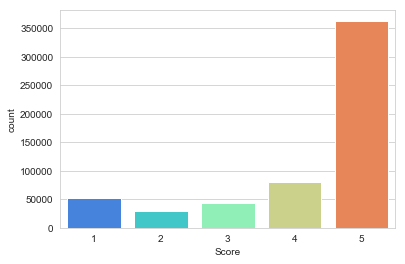

In [9]:
sns.countplot(x='Score',data=df,palette='rainbow')

Most of the `Scores` are 5

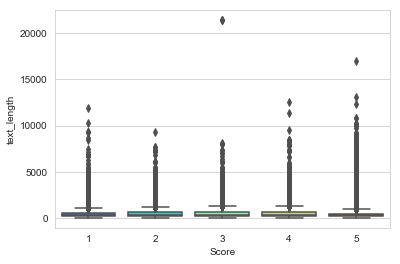

In [10]:
sns.boxplot(x='Score',y='text_length',data=df,palette='rainbow')

In [11]:
corr = df.groupby(by='Score').mean()
corr = corr.corr()

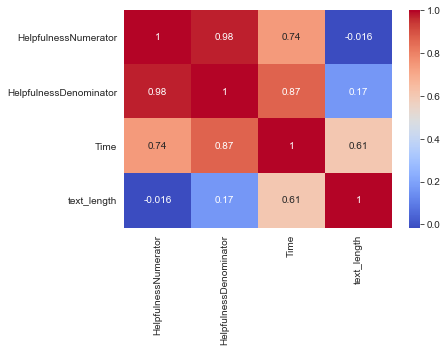

In [12]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

## NLP Classification

To make things simple, lets divide the `Scores` into either 1 or 5.

In [13]:
df_score = df[(df.Score==1) | (df.Score==5)]

Also take 50,000 reviews from each since our dataset is big

In [14]:
df_score_low = df_score[df_score.Score==1][:50000]
df_score_high = df_score[df_score.Score==5][:50000]

Combine datasets into `df_score`

In [15]:
df_score = df_score_low.append(df_score_high)
df_score.shape

(100000, 10)

Divide data into `Score` and `Text`

In [16]:
X = df_score.Text
y = df_score.Score

Initialize using CountVectorizer and fit data

In [17]:
cv = CountVectorizer()
X = cv.fit_transform(X)

Split data into test and training sets (set text_size to 0.2)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=101)

#### Naive Bayes Classifier

In [19]:
# fit data into model
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
# predict model on test set
prediction = nb.predict(X_test)

In [21]:
print(confusion_matrix(y_test,prediction))
print('\n',classification_report(y_test,prediction))

[[8904 1133]
 [ 825 9138]]

               precision    recall  f1-score   support

           1       0.92      0.89      0.90     10037
           5       0.89      0.92      0.90      9963

    accuracy                           0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000



#### Logistic Regression

In [22]:
# initialize and fit data
lr = LogisticRegression()
lr.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# predict model on test set
prediction = lr.predict(X_test)

In [24]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           1       0.94      0.94      0.94     10037
           5       0.94      0.94      0.94      9963

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



#### Using TF-IDF Transformer: Naive Bayes

In [28]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [30]:
# split data
X = df_score.Text
y = df_score.Score
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=101)

In [31]:
# fit train data
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [32]:
# predict data
prediction = pipeline.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[9168  869]
 [ 878 9085]]
              precision    recall  f1-score   support

           1       0.91      0.91      0.91     10037
           5       0.91      0.91      0.91      9963

    accuracy                           0.91     20000
   macro avg       0.91      0.91      0.91     20000
weighted avg       0.91      0.91      0.91     20000



#### Using TF-IDF Tranformer: Logistic Regression

In [33]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [34]:
# split data
X = df_score.Text
y = df_score.Score
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=101)

In [35]:
# fit train data
pipeline.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

In [36]:
# predict data
prediction = pipeline.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[[9422  615]
 [ 714 9249]]
              precision    recall  f1-score   support

           1       0.93      0.94      0.93     10037
           5       0.94      0.93      0.93      9963

    accuracy                           0.93     20000
   macro avg       0.93      0.93      0.93     20000
weighted avg       0.93      0.93      0.93     20000

